# 🧩 W7 Titanic Data Preprocessing

此 Notebook 幫助你逐步完成 Titanic 資料前處理作業。

- 每個任務對應 `template.py` 中的一個函式。
- 完成後，請將程式複製回 `submit/W7_<學號>.py`。
- 可在此 Notebook 直接測試結果是否正確。

---

## 任務 1️⃣：載入資料 (load_data)

**目標：**
- 讀取 `data/titanic.csv`
- 將欄位名稱統一為首字母大寫（例如：`age` → `Age`）
- 回傳資料 DataFrame 與缺失值總數

In [2]:
import pandas as pd
import numpy as np

# TODO 1.1: 讀取 CSV
# TODO 1.2: 統一欄位首字母大寫，並計算缺失值數量
df = pd.read_csv("/workspaces/1141-ML-W7_Titanic_Preprocessing/data/titanic.csv")
df.columns = [c.capitalize() for c in df.columns]
missing_count = sum(df.isnull().sum())

print('缺失值總數:', missing_count)
df.head()

缺失值總數: 39


,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked
0,1,3,male,NaN,1,1,15.2458,C
1,0,2,male,31.0,0,0,10.5000,S
2,0,3,male,20.0,0,0,7.9250,S
3,1,2,female,6.0,0,1,33.0000,S
4,1,3,female,14.0,1,0,11.2417,C


✅ **檢查點：**
- 欄位中應該包含 `Age`, `Fare`, `Embarked` 等。
- 缺失值數量應為整數。

## 任務 2️⃣：處理缺失值 (handle_missing)

**目標：**
- 用 `Age` 的中位數填補缺失值
- 用 `Embarked` 的眾數填補缺失值

**提示：** 使用 `fillna()`、`median()`、`mode()[0]`

In [3]:
# TODO 2.1: 以 Age 中位數填補
# TODO 2.2: 以 Embarked 眾數填補

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Sibsp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

✅ **檢查點：**
- `Age`、`Embarked` 欄位不應再有 NaN。

## 任務 3️⃣：移除異常值 (remove_outliers)

**目標：**
- 移除 `Fare` 超過 平均 + 3 × 標準差 的資料。

**提示：** `mean()`、`std()`、布林條件篩選。

In [4]:
# TODO 3.1: 計算 Fare 平均與標準差
# TODO 3.2: 移除 Fare > mean + 3*std

desc = df['Fare'].describe()
df = df[df["Fare"] <= desc["mean"] + desc["std"]*3]

print('筆數:', len(df))

筆數: 195


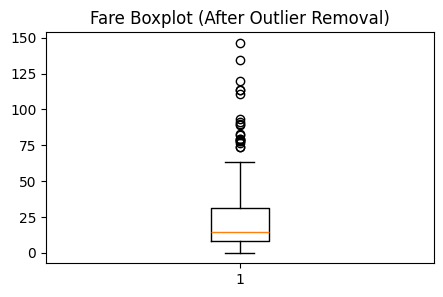

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.boxplot(df['Fare'])
plt.title('Fare Boxplot (After Outlier Removal)')
plt.show()

✅ **檢查點：**
- Boxplot 中應無極端高價票。

## 任務 4️⃣：類別變數編碼 (encode_features)

**目標：**
- 對 `Sex` 和 `Embarked` 進行 One-hot 編碼。
- 不要刪除第一個欄位（`drop_first=False`）。

**提示：** 使用 `pd.get_dummies()`。

In [6]:
# TODO 4.1: 使用 pd.get_dummies 對 Sex、Embarked 進行編碼
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex', drop_first=False)
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=False)

df.head()

,Survived,Pclass,Age,Sibsp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,29.0,1,1,15.2458,False,True,True,False,False
1,0,2,31.0,0,0,10.5000,False,True,False,False,True
2,0,3,20.0,0,0,7.9250,False,True,False,False,True
3,1,2,6.0,0,1,33.0000,True,False,False,False,True
4,1,3,14.0,1,0,11.2417,True,False,True,False,False


✅ **檢查點：**
- 欄位中應包含 `Sex_female`, `Sex_male`, `Embarked_S`。

## 任務 5️⃣：數值標準化 (scale_features)

**目標：**
- 使用 `StandardScaler` 標準化 `Age`、`Fare`。

**提示：** `scaler.fit_transform()`。

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# TODO 5.1: 使用 StandardScaler 標準化 Age、Fare
df["Age"] = scaler.fit_transform(df[["Age"]])
df["Fare"] = scaler.fit_transform(df[["Fare"]])

print(df[['Age', 'Fare']].describe())

                Age          Fare
count  1.950000e+02  1.950000e+02
mean  -6.832142e-17 -9.337260e-17
std    1.002574e+00  1.002574e+00
min   -2.278542e+00 -9.834898e-01
25%   -6.325193e-01 -6.939740e-01
50%   -8.825118e-02 -4.533464e-01
75%    4.560169e-01  1.632727e-01
max    3.177358e+00  4.388998e+00


✅ **檢查點：**
- Age 與 Fare 的平均應接近 0，標準差應接近 1。

## 任務 6️⃣：資料切割 (split_data)

**目標：**
- 將 `Survived` 作為 y，其餘欄位作為 X。
- 使用 `train_test_split`，測試集比例 0.2。

**提示：** 設定 `random_state=42`。

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)
Y = df["Survived"]

# TODO 6.1: 將 Survived 作為 y，其餘為 X
# TODO 6.2: 使用 train_test_split 切割 (test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print('訓練集筆數:', len(X_train))
print('測試集筆數:', len(X_test))

訓練集筆數: 156
測試集筆數: 39


✅ **檢查點：**
- 測試集應約佔 20%。

## 任務 7️⃣：輸出結果 (save_data)

**目標：**
- 將清理後資料輸出為 `data/titanic_processed.csv`
- 使用 `encoding='utf-8-sig'`。

In [10]:
# TODO 7.1: 將清理後資料輸出為 CSV (encoding='utf-8-sig')

df.to_csv('data/titanic_processed.csv', encoding='utf-8-sig')
print('✅ 資料處理完成並已輸出至 data/titanic_processed.csv')

✅ 資料處理完成並已輸出至 data/titanic_processed.csv
